In [1]:
## NAME: SHALINI K
## REGISTER NUMBER: 212222240095

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

SHALINI K 212222240095


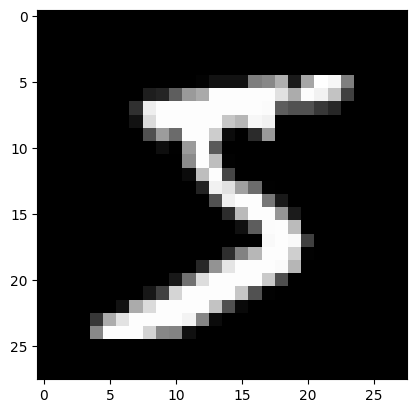

In [7]:
print("SHALINI K 212222240095")
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

In [ ]:
X_train.max()

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

SHALINI K 212222240095


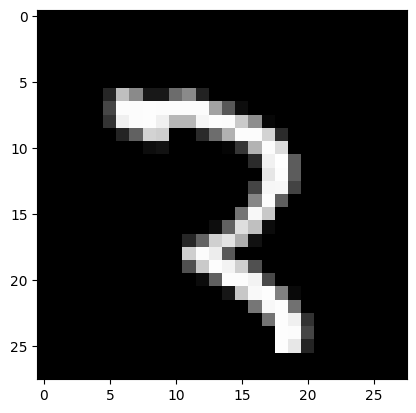

In [18]:
single_image = X_train[500]
print("SHALINI K 212222240095")
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 32)                147488    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 64s 67ms/step - loss: 0.1916 - accuracy: 0.9420 - val_loss: 0.0756 - val_accuracy: 0.9773
Epoch 2/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0604 - accuracy: 0.9809 - val_loss: 0.0496 - val_accuracy: 0.9836
Epoch 3/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0466 - val_accuracy: 0.9846
Epoch 4/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0475 - val_accuracy: 0.9849
Epoch 5/5
938/938 [==============================] - 81s 86ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0442 - val_accuracy: 0.9857


In [26]:
metrics = pd.DataFrame(model.history.history)

In [27]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.191628,0.941983,0.075624,0.9773
1,0.060409,0.980917,0.049581,0.9836
2,0.042002,0.986817,0.046614,0.9846
3,0.032109,0.990267,0.047525,0.9849
4,0.024983,0.992017,0.044164,0.9857


SHALINI K 212222240095


<Axes: >

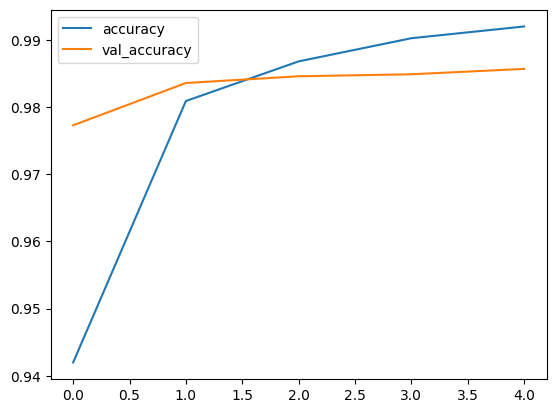

In [28]:
print("SHALINI K 212222240095")
metrics[['accuracy','val_accuracy']].plot()

SHALINI K 212222240095


<Axes: >

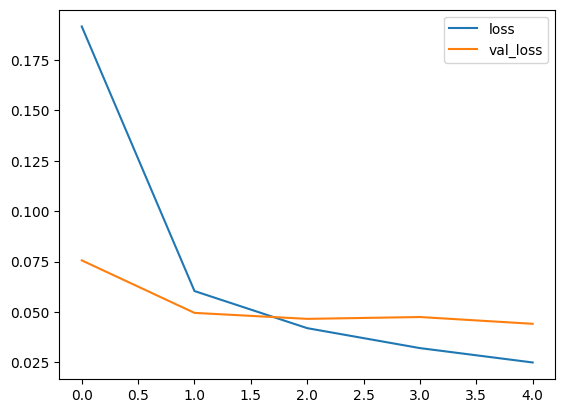

In [29]:
print("SHALINI K 212222240095")
metrics[['loss','val_loss']].plot()

In [30]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 9ms/step


In [31]:
print("SHALINI K 212222240095")
print(confusion_matrix(y_test,x_test_predictions))

SHALINI K 212222240095
[[ 971    0    1    1    0    1    1    0    3    2]
 [   0 1120    2    2    0    1    2    1    6    1]
 [   1    1 1020    0    0    0    0    5    4    1]
 [   1    0    2  999    0    5    0    1    1    1]
 [   0    0    1    0  964    0    1    0    2   14]
 [   2    0    0    7    0  879    2    0    1    1]
 [   4    3    1    0    2    2  943    0    3    0]
 [   1    0   10    2    0    0    0 1006    1    8]
 [   2    0    3    0    0    0    0    2  964    3]
 [   0    0    0    2    3    7    0    3    3  991]]


In [32]:
print("SHALINI K 212222240095")
print(classification_report(y_test,x_test_predictions))

SHALINI K 212222240095
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [34]:
img = image.load_img('imagefive.png')

In [35]:
type(img)

PIL.Image.Image

In [37]:
img = image.load_img('imagefive.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [38]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 63ms/step


In [39]:
print(x_single_prediction)

[5]


SHALINI K 212222240095


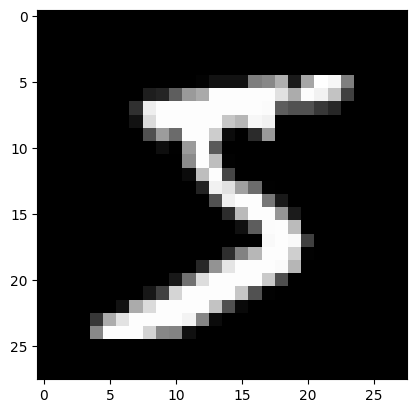

In [40]:
print("SHALINI K 212222240095")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [41]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [42]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 32ms/step


In [44]:
print(x_single_prediction)
print("SHALINI K 21222240095")

[5]
SHALINI K 21222240095
